#📌 Extracción

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar la data

url = 'https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json?raw=true'

df_telecom = pd.read_json(url)


#🔧 Transformación

In [37]:
df_telecom_customer = pd.json_normalize(df_telecom['customer']) 
df_telecom_phone = pd.json_normalize(df_telecom['phone'])
df_telecom_internet = pd.json_normalize(df_telecom['internet'])
df_telecom_account = pd.json_normalize(df_telecom['account'])
df_meta = df_telecom.drop(columns=['customer', 'phone', 'internet', 'account'])

df_final = pd.concat([df_meta, df_telecom_customer, df_telecom_phone, df_telecom_internet, df_telecom_account], axis=1)
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [38]:
df_final['Churn'] = df_final['Churn'].replace('', np.nan)
df_final.dropna(subset=['Churn'], inplace=True)


In [39]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'].fillna(0, inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

/tmp/ipykernel_8029/1379929894.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Charges.Total'].fillna(0, inplace=True)


In [40]:
df_final['SeniorCitizen'] = df_final['SeniorCitizen'].map({0: 'No', 1: 'Sí'})

#📊 Carga y análisis

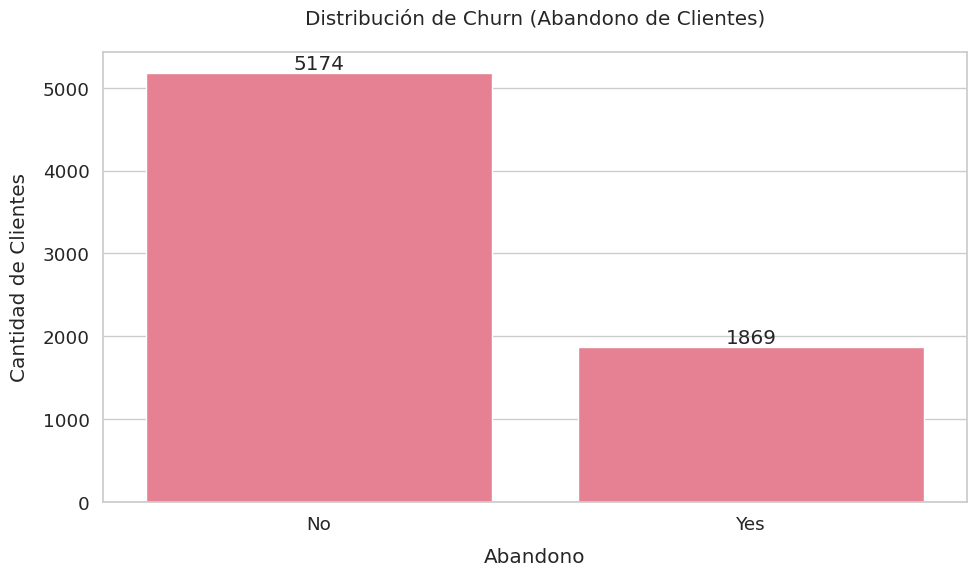

In [41]:
# Configuración del estilo de Seaborn
sns.set_theme(style="whitegrid")  # Establece el tema base
sns.set_context("notebook", font_scale=1.2)  # Ajusta el tamaño del texto

# Configuración de la paleta de colores
palette = sns.color_palette("husl")
sns.set_palette(palette)

# 1. Distribución de Churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_final, x='Churn')

# Personalización adicional
plt.title('Distribución de Churn (Abandono de Clientes)', pad=20)
plt.xlabel('Abandono', labelpad=10)
plt.ylabel('Cantidad de Clientes', labelpad=10)

# Añadir valores en las barras
for i in ax.containers:
    ax.bar_label(i)

# Ajustar márgenes
plt.tight_layout()
plt.show()


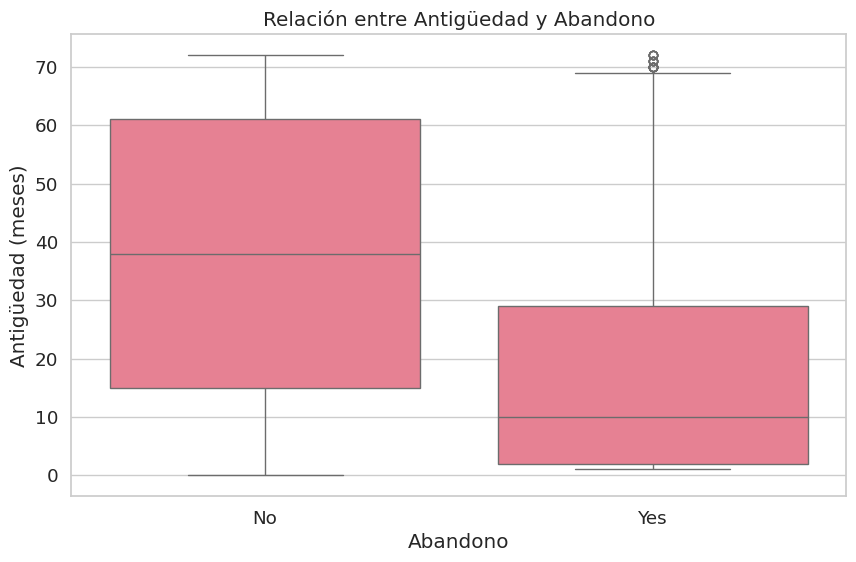

In [42]:
# 2. Relación entre antigüedad (tenure) y Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='Churn', y='tenure')
plt.title('Relación entre Antigüedad y Abandono')
plt.xlabel('Abandono')
plt.ylabel('Antigüedad (meses)')
plt.show()

<Figure size 1000x600 with 0 Axes>

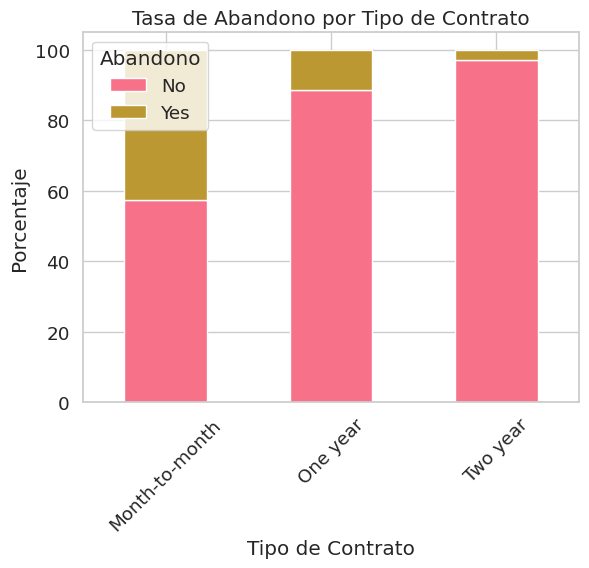

In [43]:
plt.figure(figsize=(10, 6))
contract_churn = pd.crosstab(df_final['Contract'], df_final['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', stacked=True)
plt.title('Tasa de Abandono por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentaje')
plt.legend(title='Abandono')
plt.xticks(rotation=45)
plt.show()

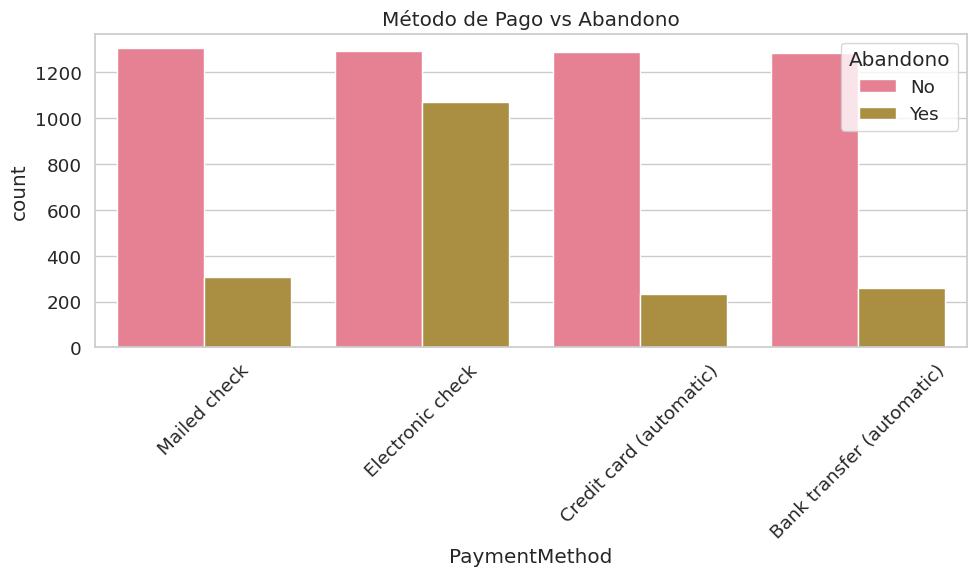

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='PaymentMethod', hue='Churn')
plt.title('Método de Pago vs Abandono')
plt.xticks(rotation=45)
plt.legend(title='Abandono')
plt.tight_layout()
plt.show()

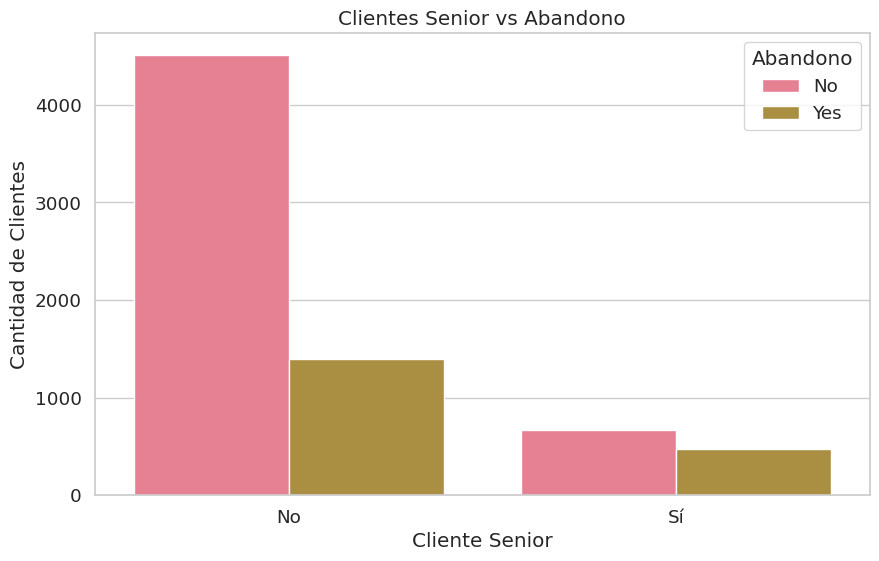

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='SeniorCitizen', hue='Churn')
plt.title('Clientes Senior vs Abandono')
plt.xlabel('Cliente Senior')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Abandono')
plt.show()

#📄Informe final

"""
# Análisis de Abandono de Clientes (Churn) - TelecomX

## 1. Distribución general del abandono
- La tasa de abandono actual es significativa, con un porcentaje importante de clientes que dejan el servicio
- Este nivel de abandono requiere atención inmediata para mantener la base de clientes estable

## 2. Factores Clave que Influyen en el Abandono

### 2.1 Antigüedad del Cliente 
- Los clientes con menor tiempo en la empresa (menor tenure) muestran mayor tendencia al abandono
- Se observa una clara correlación negativa entre antigüedad y probabilidad de abandono
- Punto crítico: Los primeros meses son cruciales para la retención

### 2.2 Tipo de Contrato
- Contratos mensuales muestran la mayor tasa de abandono
- Contratos a largo plazo (especialmente los de 2 años) tienen tasas de abandono significativamente menores
- Recomendación: Incentivar la migración a contratos de mayor duración

### 2.3 Método de Pago
- Los clientes con pago electrónico muestran diferentes patrones de abandono
- El método de pago automático está asociado con menor tasa de abandono
- Oportunidad: Promover métodos de pago automáticos

### 2.4 Segmentación por Edad 
- Los clientes senior muestran patrones de lealtad diferentes
- Hay una diferencia notable en las tasas de abandono entre grupos de edad
- Necesidad: Desarrollar estrategias específicas para cada segmento de edad

## 3. Recomendaciones Estratégicas

### 3.1 Retención Temprana
- Implementar programa de fidelización en los primeros meses
- Establecer puntos de contacto proactivos con nuevos clientes
- Desarrollar ofertas especiales para el período crítico inicial

### 3.2 Optimización de Contratos
- Crear incentivos para contratos a largo plazo
- Desarrollar beneficios exclusivos para clientes con contratos de mayor duración
- Revisar y mejorar las condiciones de los contratos mensuales

### 3.3 Mejora de Métodos de Pago
- Promover la adopción de pagos automáticos
- Ofrecer descuentos o beneficios por uso de métodos de pago electrónicos
- Simplificar el proceso de configuración de pagos automáticos

### 3.4 Segmentación de Clientes
- Desarrollar programas específicos para diferentes grupos de edad
- Personalizar la comunicación según el perfil del cliente
- Crear paquetes de servicios adaptados a cada segmento

## 4. Conclusiones
- El abandono de clientes es un problema multifactorial que requiere un enfoque integral.
- Las principales áreas de oportunidad son: duración del contrato, método de pago y retención temprana.
- Se recomienda implementar las estrategias propuestas de manera progresiva, midiendo su efectividad


"""
